# Projeto 3
## Felipe Scandiuzzi M. Netto e Maria Clara L. Luques
## 2C - Ciência dos Dados

### Usando a variável 'expectativa de vida' como resposta, decidimos utilizar as variáveis '% de adultos entre 15 e 49 anos com HIV' e 'renda per capita', todas no ano de 2010. Tais variáveis foram escolhidas tendo como base o fato de que os aspectos que mais influenciam na expectatica de vida de um país estão relacionados à saúde e à renda da sua população, sendo esses pontos diretamente ligados à boa ou má qualidade de vida do país analisado. 

## Expectativa de vida vs. HIV (% da população entre 15 e 49 anos)
<img src="exhiv.png"/, width=840, height=720 align='center'>
## Expectativa de vida vs. PIB per capita
<img src="expercapita.png"/, width=840, height=700 align='center'>

In [1]:
'''Importando bibliotecas necessárias'''

%matplotlib inline

import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd
import numpy as np

import statsmodels.api as sm1 #Usa OLS com X como matriz de planejamento
import statsmodels.formula.api as sm  #Usa OLS como no R

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\felipe\Dropbox\Co-Design de Aplicativos\CD\Felipe e Clara


In [2]:
'''Verificando o diretório'''
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\felipe\Dropbox\Co-Design de Aplicativos\CD\Felipe e Clara


In [3]:
'''Lendo tabelas do excel'''

dados1 = pd.read_excel("expectativa.xlsx",index_col=0)
dados2 = pd.read_excel('hiv.xlsx',index_col=0)
dados3 = pd.read_excel('per_capita.xlsx',index_col=0)
dados4 = pd.read_excel('EstudoMulheres.xlsx', index_col=0)

'''Separando apenas o ano de 2010 e transformando em DataFrame'''

expec = pd.DataFrame(dados1.ExpecV)
expec = expec.sort_values(['ExpecV'], axis=0, ascending=True)
hiv = pd.DataFrame(dados2.HIVs)
hiv = hiv.sort_values(['HIVs'], axis=0, ascending=True)
lnhiv = pd.DataFrame(dados2.LNHIVs)
per_capita = pd.DataFrame(dados3.PerCap)
lnpercap = pd.DataFrame(dados3.LNPerCap)
Emulheres = pd.DataFrame(dados4.EstMu)

In [4]:
'''Os Países com 'Nan' em alguma das variáveis não foram retirados ainda para não haver conflito entre o numero de paises em 
cada uma das tabelas, pois nem todos com falta de dados necessariamente tem esse deficit em todas as variáveis.'''

"Os Países com 'Nan' em alguma das variáveis não foram retirados ainda para não haver conflito entre o numero de paises em \ncada uma das tabelas, pois nem todos com falta de dados necessariamente tem esse deficit em todas as variáveis."

In [5]:
'''Juntando os dataframes a serem usados'''

dados = expec.join(hiv, how='outer')
dados = dados.join(per_capita, how='outer')
dados = dados.join(lnhiv, how='outer')
dados = dados.join(lnpercap, how='outer')
dados = dados.join(Emulheres, how='outer')

'''Retirando as variáveis que tem ao menos um "NaN" em uma das colunas'''

dados = dados[~np.isnan(dados.ExpecV)]
dados = dados[~np.isnan(dados.HIVs)]
dados = dados[~np.isnan(dados.PerCap)]
dados = dados[~np.isnan(dados.LNHIVs)]
dados = dados[~np.isnan(dados.LNPerCap)]
dados = dados[~np.isnan(dados.EstMu)]

dados.head(10) #10 primeiras linhas para conferir se tudo correu como esperado

,ExpecV,HIVs,PerCap,LNHIVs,LNPerCap,EstMu
Afghanistan,53.6,0.06,1637.0,-2.813702,7.401388,0.8
Angola,57.6,2.10,7047.0,0.742014,8.861276,4.5
Argentina,75.8,0.40,15765.0,-0.916386,9.666550,11.4
Armenia,73.0,0.20,6508.0,-1.609605,8.781698,11.4
Australia,82.0,0.20,41330.0,-1.609605,10.630446,12.7
Austria,80.5,0.40,42861.0,-0.916386,10.666824,11.4
Azerbaijan,70.1,0.10,15950.0,-2.302824,9.678218,11.9
Bahamas,72.7,2.80,22915.0,1.029726,10.040588,12.0
Bangladesh,68.8,0.06,2459.0,-2.813702,7.808320,4.7
Belarus,70.2,0.40,15703.0,-0.916386,9.662609,12.4


In [6]:
dados.shape #verificando a quantidade de linhas/colunas final

(133, 6)

## Análise Descritiva

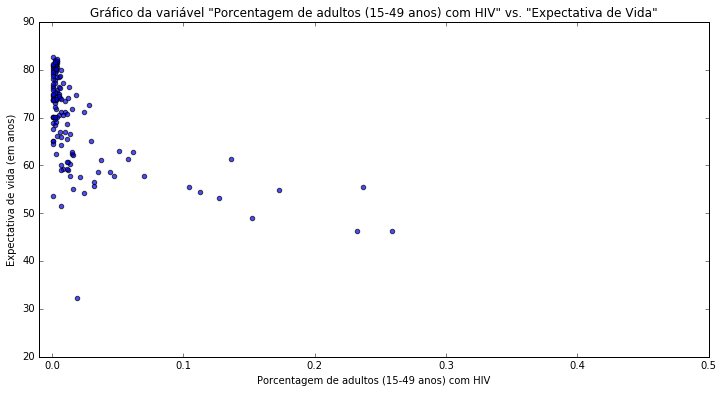

In [7]:
'''Gráfico da variável "Porcentagem de adultos (15-49 anos) com HIV" por "Expectativa de Vida"'''

fig = plt.figure(figsize=(12, 6))
plt.scatter(dados.HIVs/100, dados.ExpecV, alpha=0.7)
plt.xlabel("Porcentagem de adultos (15-49 anos) com HIV")
plt.ylabel("Expectativa de vida (em anos)")
plt.title('Gráfico da variável "Porcentagem de adultos (15-49 anos) com HIV" vs. "Expectativa de Vida"')
plt.xlim(-0.01,0.5)
plt.show()

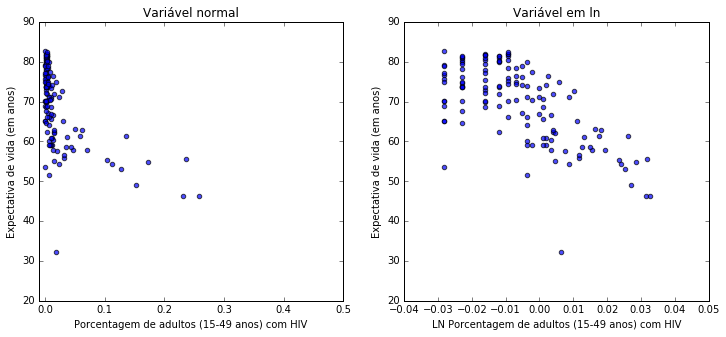

In [8]:
'''Comparando a variável acima com sua tranformação em ln'''

f, ax = plt.subplots(1,2,figsize=(12,5))

ax[0].scatter(dados.HIVs/100, dados.ExpecV, alpha=0.7) #tranformando em porcentagem
ax[0].set_xlabel("Porcentagem de adultos (15-49 anos) com HIV")
ax[0].set_ylabel("Expectativa de vida (em anos)")
ax[0].set_title('Variável normal')
ax[0].set_xlim(-0.01,0.5)

ax[1].scatter(dados.LNHIVs/100, dados.ExpecV, alpha=0.7)
ax[1].set_xlabel("LN Porcentagem de adultos (15-49 anos) com HIV")
ax[1].set_ylabel("Expectativa de vida (em anos)")
ax[1].set_title('Variável em ln')

plt.show()

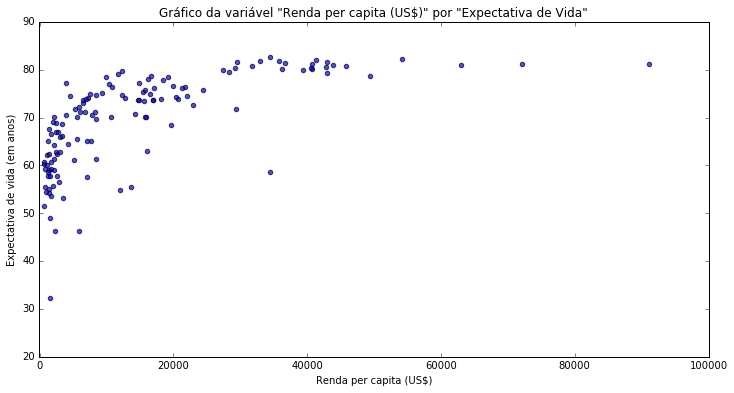

In [9]:
'''Gráfico da variável "Renda per capita (US$)" por "Expectativa de Vida"'''

fig = plt.figure(figsize=(12, 6))
plt.scatter(dados.PerCap, dados.ExpecV, alpha=0.7) 
plt.xlabel("Renda per capita (US$)")
plt.ylabel("Expectativa de vida (em anos)")
plt.title('Gráfico da variável "Renda per capita (US$)" por "Expectativa de Vida"')
plt.xlim(-100,100000)
plt.show()

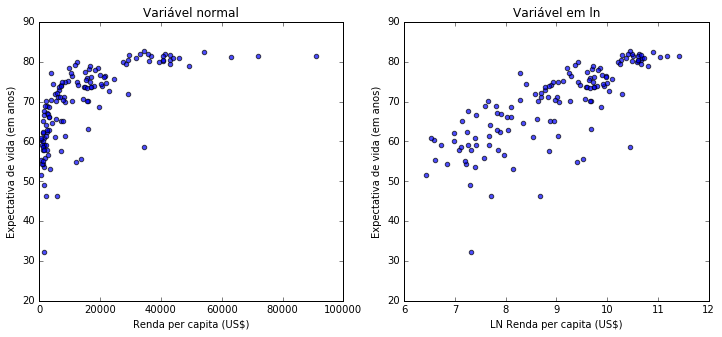

In [10]:
'''Comparação da variável acima com sua transformação em ln'''

f, ax = plt.subplots(1,2,figsize=(12,5))

ax[0].scatter(dados.PerCap, dados.ExpecV, alpha=0.7)
ax[0].set_xlabel("Renda per capita (US$)")
ax[0].set_ylabel("Expectativa de vida (em anos)")
ax[0].set_title('Variável normal')
ax[0].set_xlim(-100,100000)

ax[1].scatter(dados.LNPerCap, dados.ExpecV, alpha=0.7)
ax[1].set_xlabel("LN Renda per capita (US$)")
ax[1].set_ylabel("Expectativa de vida (em anos)")
ax[1].set_title('Variável em ln')

plt.show()

In [11]:
'''Correlação entre todas as variáveis'''

dados.corr(method='pearson')

,ExpecV,HIVs,PerCap,LNHIVs,LNPerCap,EstMu
ExpecV,1.000000,-0.573500,0.657795,-0.663744,0.781098,0.689243
HIVs,-0.573500,1.000000,-0.211745,0.742749,-0.223086,-0.128778
PerCap,0.657795,-0.211745,1.000000,-0.341194,0.852652,0.641712
LNHIVs,-0.663744,0.742749,-0.341194,1.000000,-0.427872,-0.376587
LNPerCap,0.781098,-0.223086,0.852652,-0.427872,1.000000,0.831703
EstMu,0.689243,-0.128778,0.641712,-0.376587,0.831703,1.000000


In [12]:
'''Cálculo de parâmetros'''

model = sm.ols(formula='ExpecV ~ LNHIVs + LNPerCap', data = dados)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ExpecV   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     188.0
Date:                Tue, 06 Dec 2016   Prob (F-statistic):           4.38e-39
Time:                        23:11:41   Log-Likelihood:                -399.96
No. Observations:                 133   AIC:                             805.9
Df Residuals:                     130   BIC:                             814.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     25.7282      3.370      7.635      0.000        19.061    32.395
LNHIVs        -2.5429      0.310     -8.201      0.000        -3.156    -1.929
LNPerCap       4.7134      0.381     12.371      0.000         3.960     5.467
==============================================================================
Omnibus:                       60.262   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.974
Skew:                          -1.629   Prob(JB):                     6.99e-51
Kurtosis:                       8.574   Cond. No.                         72.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<IPython.core.display.Javascript object>


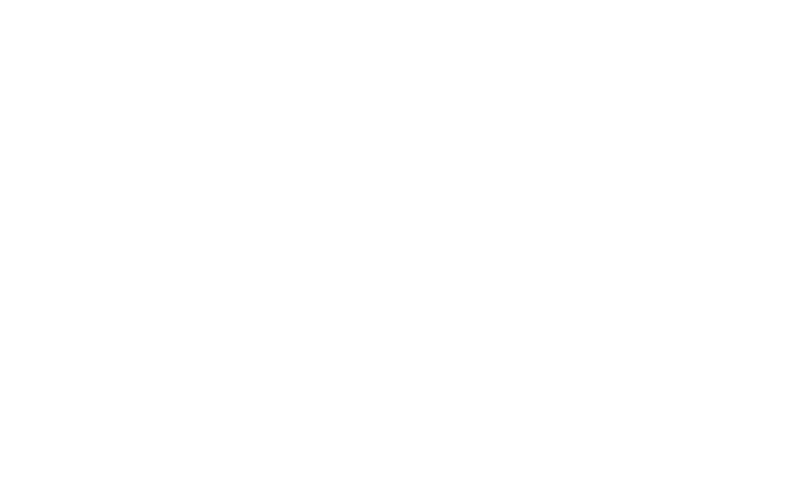

In [13]:
'''Gráfico 3D das variáveis com linha (plano) de tendência'''

#importanto biblioteca 3D
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook 
#gráfico interativo

X = dados[['LNHIVs', 'LNPerCap']]
y = dados['ExpecV']

X = sm1.add_constant(X)
est = sm1.OLS(y, X).fit()

#calculando o tamanho para a "grid" geral
xx1, xx2 = np.meshgrid(np.linspace(dados.LNHIVs.min(), dados.LNHIVs.max(), 100), 
                       np.linspace(dados.LNPerCap.min(), dados.LNPerCap.max(), 100))

Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

fig = plt.figure(figsize=(10, 6))
ax = Axes3D(fig, azim=-115, elev=15)

surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

resid = y - est.predict(X)

#plotando os pontos das variáveis
ax.scatter(X[resid >= 0].LNHIVs, X[resid >= 0].LNPerCap, y[resid >= 0], c='gold', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].LNHIVs, X[resid < 0].LNPerCap, y[resid < 0], c='black', alpha=1.0)

ax.set_xlim3d(-4, 4)
ax.set_ylim3d(6,12)
ax.set_zlim3d(0,90)

ax.set_xlabel('ln HIV')
ax.set_ylabel('ln PerCap')
ax.set_zlabel('ExpecVida')
ax.set_title('Expectativa de Vida vs. LN HIVs vs. LN PerCap')

plt.show()

## Teste de Hipóteses para Avaliação das Variáveis:

### Para avaliar a relevância das variáveis para o modelo apresentado é necessário realizar um teste de hipóteses onde para a variável '% de adultos entre 15 e 49 anos com HIV' H0: β1=0 e H1: β1 ≠0 e para a variável 'renda per capita' H0: β2=0 e H1: β2 ≠0. 
### Observando a tabela OLS pode-se perceber que o Valor-p de ambas as variáveis é 0%, o que indica um valor abaixo do nível de significância, que no caso é 5%, fazendo com que as H0 possam ser rejeitadas. Com isso, conclui-se que as duas variáveis são relevantes para o modelo.  

#    

## Adequação das Suposições:

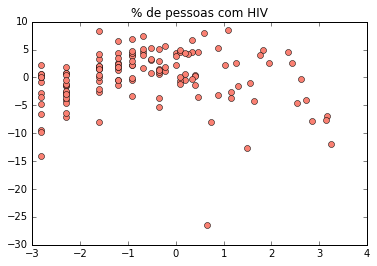

In [14]:
'''Adequação HIV'''

%matplotlib inline
plt.plot(dados.LNHIVs, fit.resid,"o", color="salmon")
plt.title("% de pessoas com HIV")
plt.show()

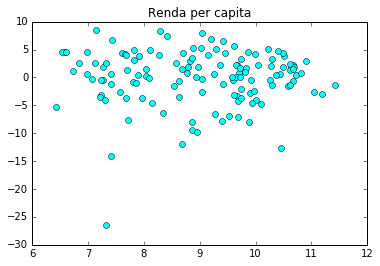

In [15]:
'''Adequação renda'''

%matplotlib inline
plt.plot(dados.LNPerCap, fit.resid,"o", color="cyan")
plt.title("Renda per capita")
plt.show()

## Verificação da Qualidade de Ajuste do modelo: 

### Para fazer essa verificação é necessário observar o valor R-squared (ou Coeficiente de Determinação) da tabela OLS. Nesse caso, esse Coeficiente, que pode variar entre 0 e 1, está em 0,743, o que determina que o ajuste do modelo pode ser considerado bom, já que quanto mais próximo de 1 for esse valor melhor é o ajuste.

#   

## Objetivo: 

#### Como primeiro objetivo, temos que relacionar as variáveis expectativa de vida e a porcentagem de adultos com HIV e analisar as respostas obtidas. Como base da relação entre essas duas variaveis, temos o seguinte artigo, "Estamos vencendo a luta contra o HIV?", da BBC Brasil, disponível em http://www.bbc.com/portuguese/noticias/2015/11/151118_combate_hiv_mundo_rm, no qual é mencionado o tratamento de HIVs e os números de mortos por essas doenças, o que afeta drasticamente a expectativa de vida de um país mais contagiado.

#### Um outro objetivo é analisar a relação exitente entre a expectativa de vida em um país com a renda per capita desse mesmo país. Segundo o site http://blog.euromonitor.com/2014/03/economic-growth-and-life-expectancy-do-wealthier-countries-live-longer.html por mais que a relação entre essas variáveis não seja muito próxima ainda há casos como o de Honn Kong, por exemplo, em que a maior renda per capita representou um aumento na expectativa de vida. Esse mesmo site analisa, ainda, a correlação existente entre a expectativa de vida e a renda per capita e chega a conclusão de que a correlação é maior em países emergentes ou em desenvolvimento do que em países desenvolvidos.

## Separação em Subgrupos: 

### Para realizar o estudo em subgrupos desse método foi escolhida uma nova variável para ser analisada a partir do mesmo modelo de regressão utilizado anteriormente. A variável escolhida foi "Anos de estudo de mulheres em idade reprodutória (15-44 anos)", pois estes são dados que coincidem com a mortalidade infantil e, portanto, com a expectativa de vida.

In [16]:
#verificando valores da variável de separação
dados.EstMu.describe()

count    133.000000
mean       8.598496
std        3.701760
min        0.800000
25%        5.500000
50%        9.400000
75%       11.900000
max       14.700000
Name: EstMu, dtype: float64

#### Como observado acima, a variável transita entre 0.8 e 14.7. Arredondando estes valores para 0 e 15, foi decidido dividir os dados então em três subgrupos: EstMu menor ou igual à 5, maior que 5 e menor ou igual à 10, e maior que 10, para que seja analisada o quanto nossa linha de tendência geral funciona para os dados em subgrupos.

<IPython.core.display.Javascript object>


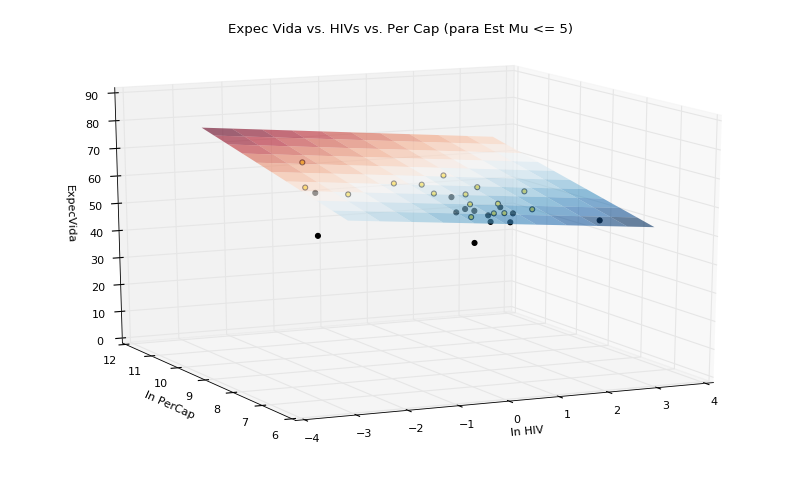

In [21]:
'''Plotando o gráfico para EstMu <= 5 '''

dados1 = dados[dados.EstMu<=5]
%matplotlib notebook

X = dados1[['LNHIVs', 'LNPerCap']]
y = dados1['ExpecV']

X = sm1.add_constant(X)
est = sm1.OLS(y, X).fit()

xx1, xx2 = np.meshgrid(np.linspace(dados.LNHIVs.min(), dados.LNHIVs.max(), 100), 
                       np.linspace(dados.LNPerCap.min(), dados.LNPerCap.max(), 100))

Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

fig = plt.figure(figsize=(10, 6))
ax = Axes3D(fig, azim=-115, elev=15)

surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

resid = y - est.predict(X)
ax.scatter(X[resid >= 0].LNHIVs, X[resid >= 0].LNPerCap, y[resid >= 0], c='gold', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].LNHIVs, X[resid < 0].LNPerCap, y[resid < 0], c='black', alpha=1.0)

ax.set_xlim3d(-4, 4)
ax.set_ylim3d(6,12)
ax.set_zlim3d(0,90)

ax.set_xlabel('ln HIV')
ax.set_ylabel('ln PerCap')
ax.set_zlabel('ExpecVida')
ax.set_title('Expec Vida vs. HIVs vs. Per Cap (para Est Mu <= 5)')

plt.show()

<IPython.core.display.Javascript object>


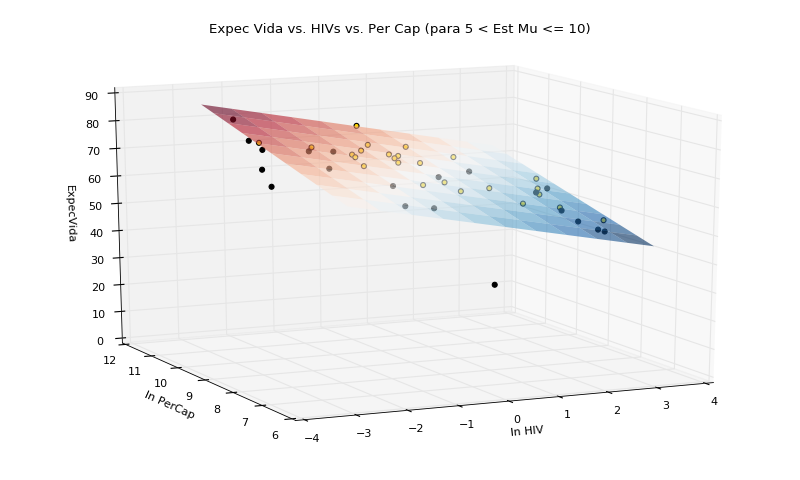

In [20]:
'''Plotando o gráfico para 5 < EstMu <= 10 '''

dados1 = dados[(dados.EstMu>5)&(dados.EstMu<=10)]

%matplotlib notebook

X = dados1[['LNHIVs', 'LNPerCap']]
y = dados1['ExpecV']

X = sm1.add_constant(X)
est = sm1.OLS(y, X).fit()

xx1, xx2 = np.meshgrid(np.linspace(dados.LNHIVs.min(), dados.LNHIVs.max(), 100), 
                       np.linspace(dados.LNPerCap.min(), dados.LNPerCap.max(), 100))

Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

fig = plt.figure(figsize=(10, 6))
ax = Axes3D(fig, azim=-115, elev=15)

surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

resid = y - est.predict(X)
ax.scatter(X[resid >= 0].LNHIVs, X[resid >= 0].LNPerCap, y[resid >= 0], c='gold', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].LNHIVs, X[resid < 0].LNPerCap, y[resid < 0], c='black', alpha=1.0)

ax.set_xlim3d(-4, 4)
ax.set_ylim3d(6,12)
ax.set_zlim3d(0,90)

ax.set_xlabel('ln HIV')
ax.set_ylabel('ln PerCap')
ax.set_zlabel('ExpecVida')
ax.set_title('Expec Vida vs. HIVs vs. Per Cap (para 5 < Est Mu <= 10)')

plt.show()

<IPython.core.display.Javascript object>


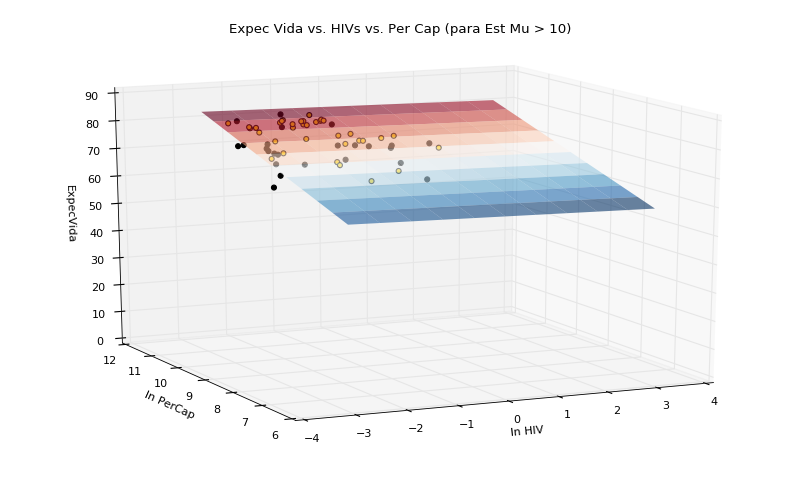

In [19]:
'''Plotando o gráfico para 5 < EstMu <= 10 '''

dados1 = dados[dados.EstMu>10]

%matplotlib notebook

X = dados1[['LNHIVs', 'LNPerCap']]
y = dados1['ExpecV']

X = sm1.add_constant(X)
est = sm1.OLS(y, X).fit()

xx1, xx2 = np.meshgrid(np.linspace(dados.LNHIVs.min(), dados.LNHIVs.max(), 100), 
                       np.linspace(dados.LNPerCap.min(), dados.LNPerCap.max(), 100))

Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

fig = plt.figure(figsize=(10, 6))
ax = Axes3D(fig, azim=-115, elev=15)

surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

resid = y - est.predict(X)
ax.scatter(X[resid >= 0].LNHIVs, X[resid >= 0].LNPerCap, y[resid >= 0], c='gold', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].LNHIVs, X[resid < 0].LNPerCap, y[resid < 0], c='black', alpha=1.0)

ax.set_xlim3d(-4, 4)
ax.set_ylim3d(6,12)
ax.set_zlim3d(0,90)

ax.set_xlabel('ln HIV')
ax.set_ylabel('ln PerCap')
ax.set_zlabel('ExpecVida')
ax.set_title('Expec Vida vs. HIVs vs. Per Cap (para Est Mu > 10)')

plt.show()

### A partir da análise dos últimos três gráficos percebe-se que mesmo sendo aplicado a uma população menor o modelo se comportou como o esperado, onde quanto maior é á quantidade de anos de estudo maior a expectativa de vida e a renda per capita. Ou seja, mesmo  que uma pequena alteração seja necessária para que se encaixasse perfeitamente nos subgrupos,o modelo original satisfaz a relação.

## Conclusão:

### Após as análises feitas pode-se concluir que as variáveis explicativas escolhidas ("% de adultos entre 15 e 49 anos com HIV" e "Renda per capita") influenciam, sim, na variável resposta "Expectativa de Vida", porém não de maneira extravagante. Os gráfcos acima indicam que quanto maior for a porcentagem de adultos com HIV menor será a expectativa de vida, assim como quanto maior a renda per capita maior será a expectativa de vida.